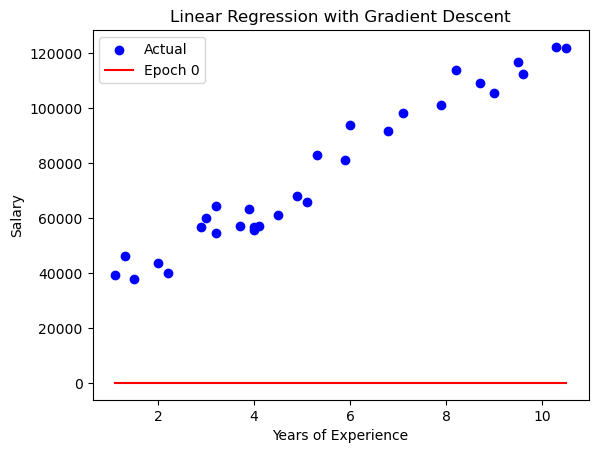

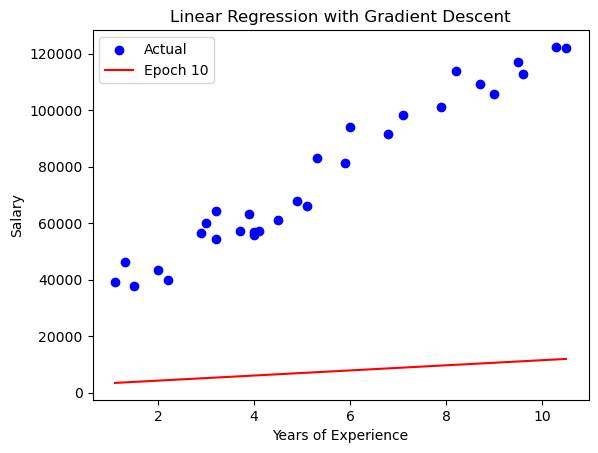

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('salary_data.csv')

# Extract feature (YearsExperience) and target (Salary)
X = df['YearsExperience'].values  # Feature
y = df['Salary'].values  # Target

# Normalize X for faster convergence
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std  # Standardization

# Add bias term (X0 = 1)
X = np.c_[np.ones(X.shape[0]), X]  # Shape (m, 2)

# Initialize parameters (theta0, theta1)
theta = np.zeros(2)

# Hyperparameters
learning_rate = 0.01
epochs = 100  # Number of iterations

# Number of training examples
m = len(y)

# Cost function history
cost_history = []

# Gradient Descent
for epoch in range(epochs):
    # Compute predictions
    y_pred = X.dot(theta)
    
    # Compute error
    error = y_pred - y
    
    # Compute gradients
    gradients = (1/m) * X.T.dot(error)
    
    # Update parameters
    theta -= learning_rate * gradients
    
    # Compute cost (Mean Squared Error)
    cost = (1/(2*m)) * np.sum(error**2)
    cost_history.append(cost)
    
    # Plot regression line every 10 epochs
    if epoch % 10 == 0:
        plt.scatter(df['YearsExperience'], y, color='blue', label='Actual')
        plt.plot(df['YearsExperience'], y_pred, color='red', label=f'Epoch {epoch}')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.title('Linear Regression with Gradient Descent')
        plt.legend()
        plt.show()

# Final model predictions
y_pred_final = X.dot(theta)

# Compute R² Score
r2 = r2_score(y, y_pred_final)

print(f"Final Parameters: Theta0 = {theta[0]:.4f}, Theta1 = {theta[1]:.4f}")
print(f"Final R² Score: {r2:.4f}")

# Plot Cost Function Convergence
plt.plot(range(epochs), cost_history, color='green')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()


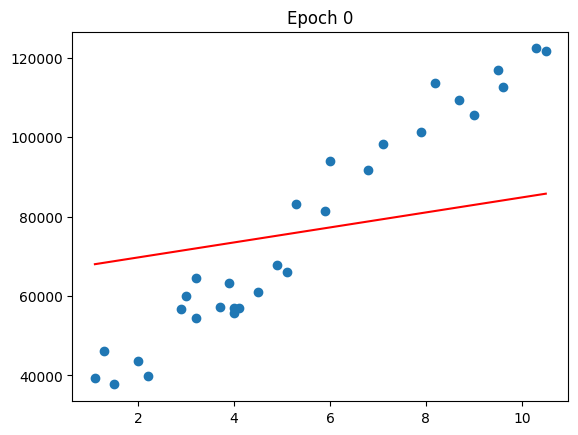

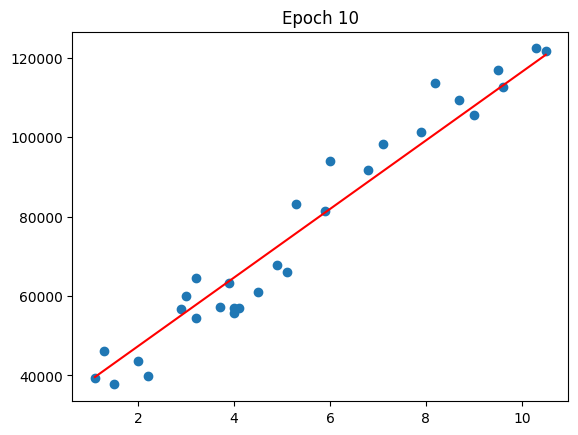

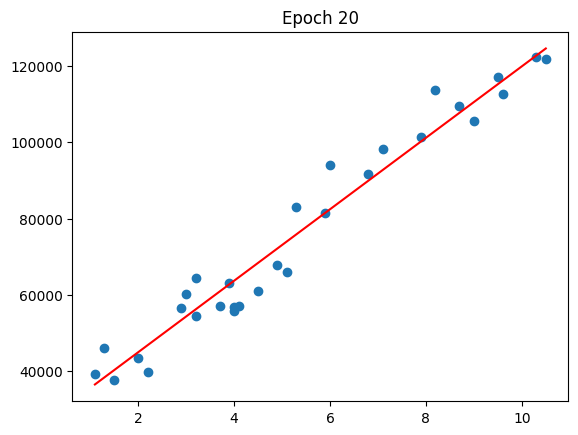

R²: 0.96


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load dataset
salary_data = pd.read_csv('salary_data.csv')
X = salary_data['YearsExperience'].values.reshape(-1, 1)
y = salary_data['Salary'].values

# Normalize data
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# Gradient Descent
theta = np.zeros(2)  # [theta0, theta1]
learning_rate = 0.1
epochs = 27

for epoch in range(epochs):
    # Hypothesis
    y_pred = theta[0] + theta[1] * X_norm.flatten()
    # Compute gradients
    grad0 = -2 * np.mean(y_norm - y_pred)
    grad1 = -2 * np.mean((y_norm - y_pred) * X_norm.flatten())
    # Update theta
    theta -= learning_rate * np.array([grad0, grad1])
    
    # Plot every 10 epochs
    if epoch % 10 == 0:
        plt.scatter(X, y)
        plt.plot(X, (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean(), color='red')
        plt.title(f'Epoch {epoch}')
        plt.show()

# Denormalize and compute R²
y_pred_final = (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean()
r2 = r2_score(y, y_pred_final)
print(f'R²: {r2:.2f}')

R²: 0.96


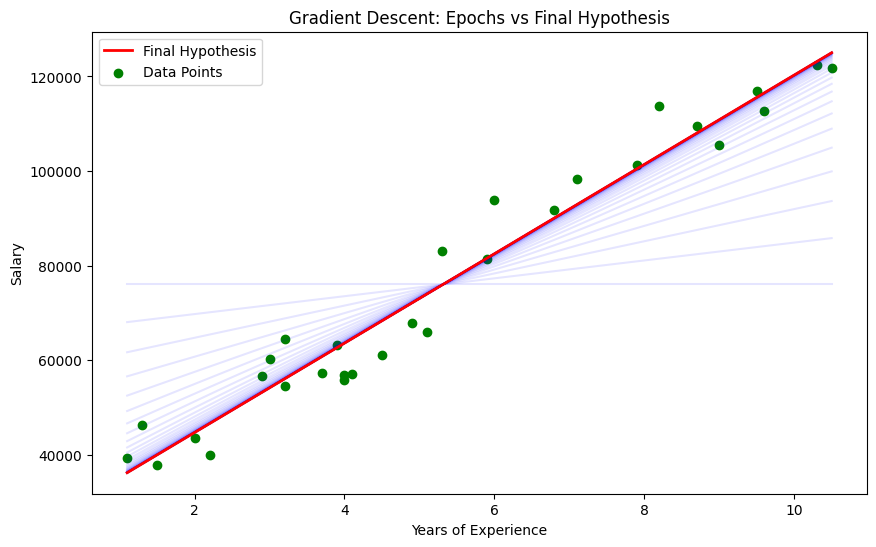

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load dataset
salary_data = pd.read_csv('salary_data.csv')
X = salary_data['YearsExperience'].values.reshape(-1, 1)
y = salary_data['Salary'].values

# Normalize data
X_norm = (X - X.mean()) / X.std()
y_norm = (y - y.mean()) / y.std()

# Gradient Descent
theta = np.zeros(2)  # [theta0, theta1]
learning_rate = 0.1
epochs = 50

# Store predictions for each epoch
epoch_predictions = []

# Perform gradient descent
for epoch in range(epochs):
    # Hypothesis
    y_pred = theta[0] + theta[1] * X_norm.flatten()
    epoch_predictions.append(y_pred)  # Store predictions for this epoch
    
    # Compute gradients
    grad0 = -2 * np.mean(y_norm - y_pred)
    grad1 = -2 * np.mean((y_norm - y_pred) * X_norm.flatten())
    
    # Update theta
    theta -= learning_rate * np.array([grad0, grad1])

# Denormalize predictions
y_pred_final = (theta[0] + theta[1] * X_norm.flatten()) * y.std() + y.mean()
r2 = r2_score(y, y_pred_final)
print(f'R²: {r2:.2f}')

# Plot all epochs in a single graph
plt.figure(figsize=(10, 6))
for i, y_pred_epoch in enumerate(epoch_predictions):
    # Denormalize predictions for plotting
    y_pred_epoch_denorm = y_pred_epoch * y.std() + y.mean()
    plt.plot(X, y_pred_epoch_denorm, alpha=0.1, color='blue')  # Plot each epoch

# Plot final hypothesis
plt.plot(X, y_pred_final, color='red', linewidth=2, label='Final Hypothesis')

# Plot data points
plt.scatter(X, y, color='green', label='Data Points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Gradient Descent: Epochs vs Final Hypothesis')
plt.legend()
plt.show()